## 1. Contexto

## 2. El set de datos después de la limpieza
La información recolectada se encuentra en un archivo CSV (vic_elec_125256_clean_data.csv) con 515 filas y 5 columnas.

## 3. Lectura del Dataset

In [1]:
# Importar librerias/modulos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lecturas
ruta="../results/vic_elec_125256_clean_data.csv"
data=pd.read_csv(ruta)

In [3]:
#Imprimmir el dataset
print(data.shape)
data.head()

(515, 5)


Time       Demand  Temperature        Date  Holiday
0  2012-01-02T04:30:00Z  7055.279186        38.75  2012-01-02     True
1  2012-01-02T05:00:00Z  7146.871210        39.20  2012-01-02     True
2  2012-01-02T05:30:00Z  7261.476696        39.40  2012-01-02     True
3  2012-01-02T06:00:00Z  7300.065136        39.60  2012-01-02     True
4  2012-01-02T06:30:00Z  7345.248890        39.45  2012-01-02     True

## 4. Análisis exploratorio
La idea es usar herramientas estadísticas y de visualización para:
    1. Crear un mapa mental del dataset (entenderlo).
    2. Empezar a encontrar respuestas a las cuestiones dependiendo del contexto del análsis.

Se llevara a cabo estas fases:
    1. Análisis de cada variable de manera individual.
    2. Análisis univariado: relación de cada variable predictoria con la variable a predecir.
    3. Análisis bivariada: relación de pares de variables predictorias con la variable a predecir.

## 4.1 Análsis de cada variable de manera individual
Nos permite entender las caracteristicas generales de cada variable del dataset.

In [4]:
#Con data.info() se pueden ver las variables categoricas
#(Dtype=object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         515 non-null    object 
 1   Demand       515 non-null    float64
 2   Temperature  515 non-null    float64
 3   Date         515 non-null    object 
 4   Holiday      515 non-null    bool   
dtypes: bool(1), float64(2), object(2)
memory usage: 16.7+ KB


C:\Users\josetorres\AppData\Local\Temp\ipykernel_9756\598137189.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)
C:\Users\josetorres\AppData\Local\Temp\ipykernel_9756\598137189.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)


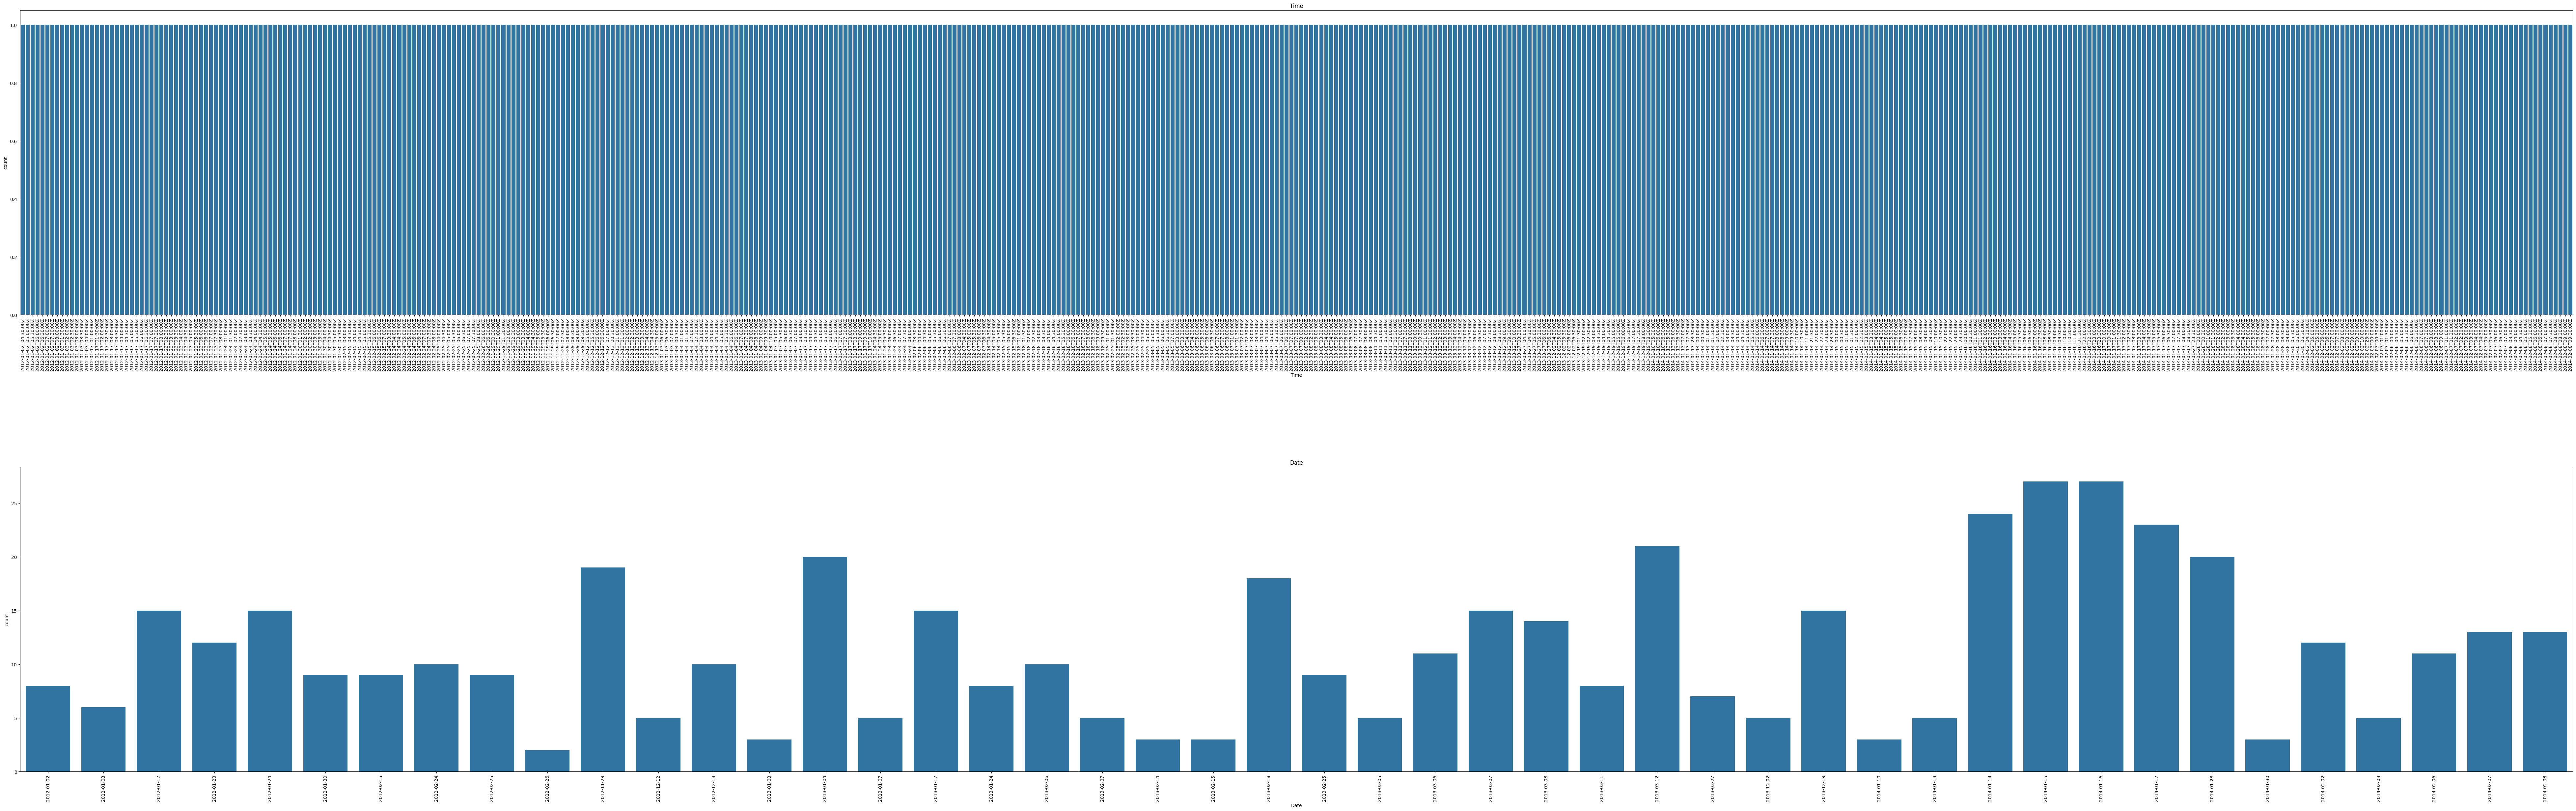

In [5]:
#Tomamos las variables categoricas y creamos graficos, para comprender mejor los datos,
#creamos grficos de barras

columnas_categorias=['Time', 'Date']

#Graficos de barras de conteo
fig, ax=plt.subplots(nrows=len(columnas_categorias),ncols=1, figsize=(100,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columnas_categorias):
    sns.countplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)

In [6]:
#Extraemos variables estadisticas descriptivas basicas
data.describe()

Demand  Temperature
count   515.000000   515.000000
mean   7722.484033    34.727282
std     616.708442     3.840043
min    7000.039926    25.700000
25%    7221.621359    32.450000
50%    7569.556370    34.600000
75%    8031.654081    37.600000
max    9345.004346    43.200000

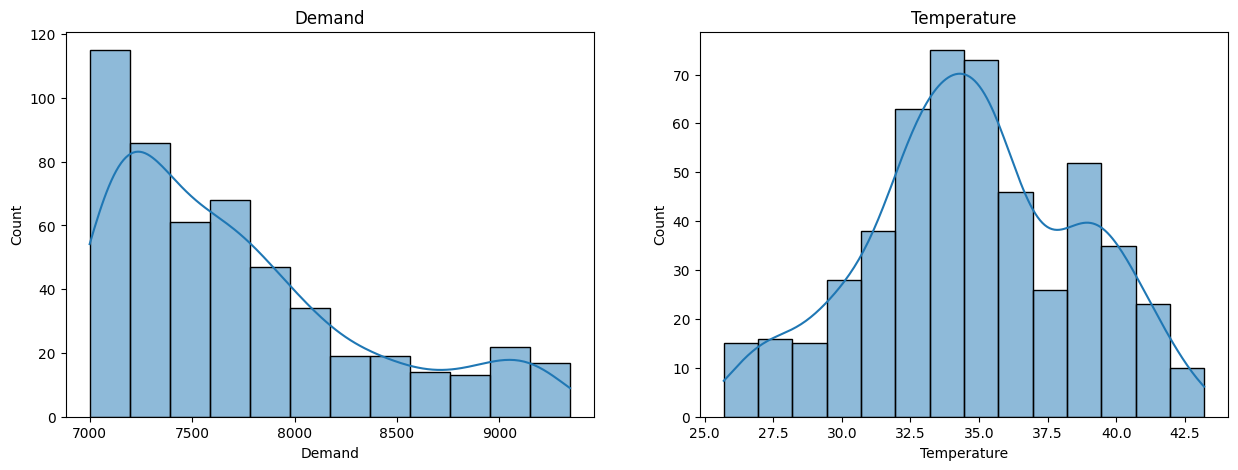

In [7]:
#Es mejor graficas los datos, para comprender mejor la informacion
#Dibujamos los histogramas

columnas_numericas=['Demand','Temperature']

fig, ax=plt.subplots(nrows=1,ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columnas_numericas):
    sns.histplot(x=col,data=data,ax=ax[i], kde=True)
    ax[i].set_title(col)

In [8]:
#Podemos ver a detalle que ocurre con Demand y Temperature
data['Demand'].describe()

count     515.000000
mean     7722.484033
std       616.708442
min      7000.039926
25%      7221.621359
50%      7569.556370
75%      8031.654081
max      9345.004346
Name: Demand, dtype: float64

In [9]:
#Podemos ver a detalle que ocurre con Demand y Temperature
data['Temperature'].describe()

count    515.000000
mean      34.727282
std        3.840043
min       25.700000
25%       32.450000
50%       34.600000
75%       37.600000
max       43.200000
Name: Temperature, dtype: float64